# Analyze Target vs Projection vs Render

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
import pandas as pd

In [2]:
proj_base = '../stylegan2-ada-josefa/out_proj'
render_base = '../stylegan2-ada-josefa/out_render'

#subfolders
proj_folders = sorted([f for f in os.listdir(proj_base) if os.path.isdir(os.path.join(proj_base, f))])
render_folders = sorted([f for f in os.listdir(render_base) if os.path.isdir(os.path.join(render_base, f))])

In [3]:
results = [] 

------------------------------ out_proj1 ------------------------------
MSE Target vs Projected: 70.55
MSE Target vs Rendered: 70.35
SSIM Target vs Projected: 0.8301
SSIM Target vs Rendered: 0.8302


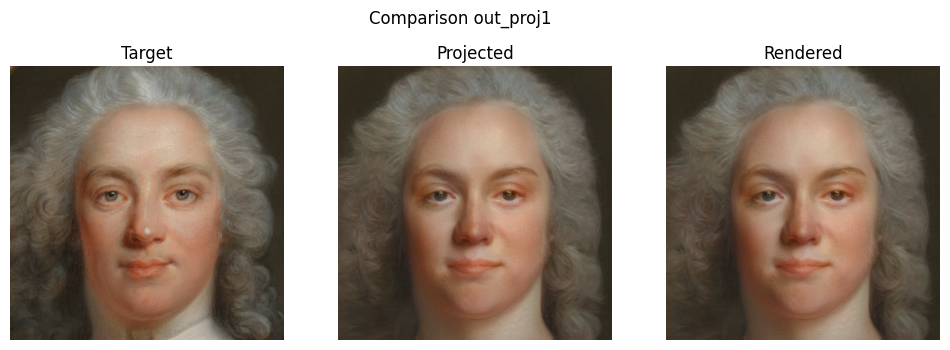

Vector W shape: (1, 18, 512), mean: 0.2722, std: 1.7127


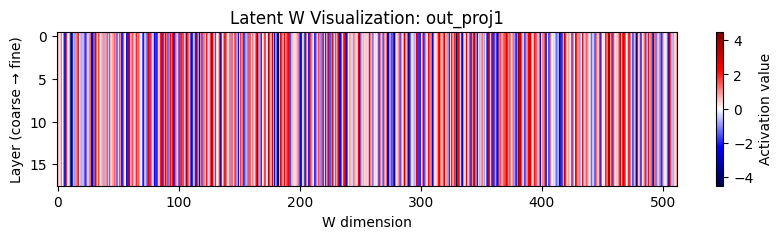

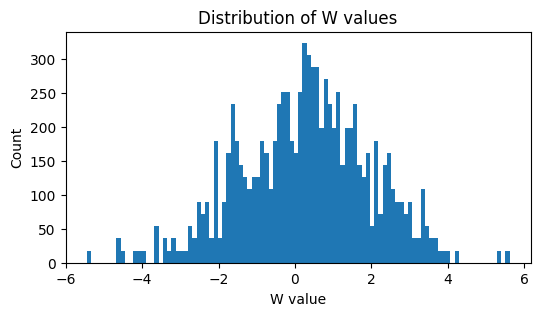

Per-layer mean: [0.272 0.272 0.272 0.272 0.272 0.272 0.272 0.272 0.272 0.272 0.272 0.272
 0.272 0.272 0.272 0.272 0.272 0.272]
Per-layer std : [1.713 1.713 1.713 1.713 1.713 1.713 1.713 1.713 1.713 1.713 1.713 1.713
 1.713 1.713 1.713 1.713 1.713 1.713]
------------------------------ out_proj2 ------------------------------
MSE Target vs Projected: 93.71
MSE Target vs Rendered: 93.72
SSIM Target vs Projected: 0.6935
SSIM Target vs Rendered: 0.6936


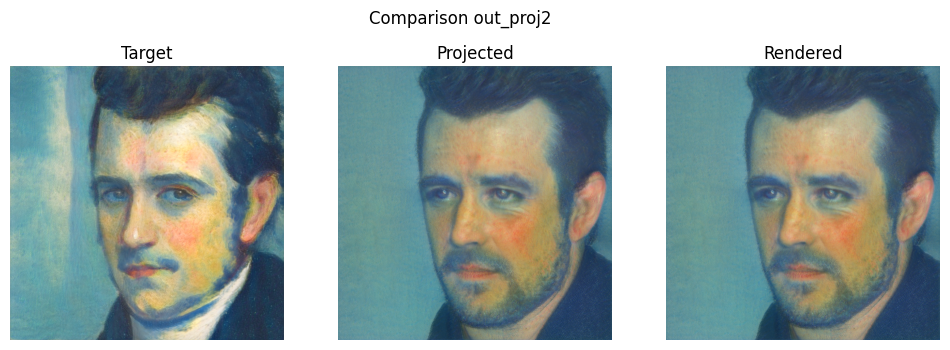

Vector W shape: (1, 18, 512), mean: 0.1560, std: 2.0877


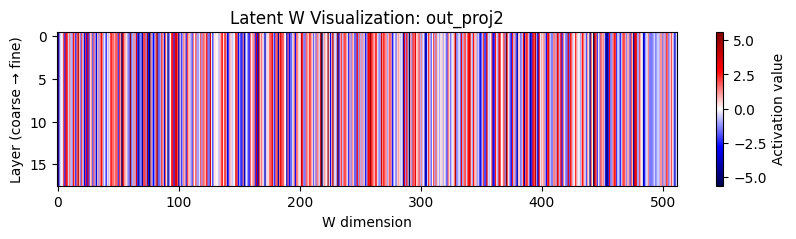

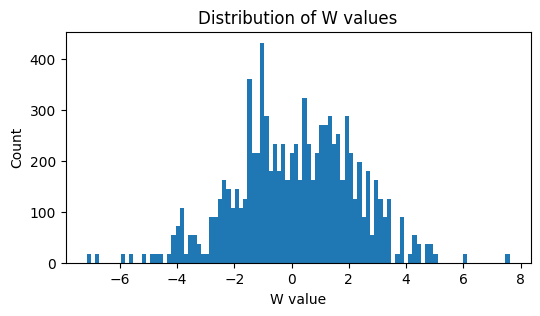

Per-layer mean: [0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156 0.156
 0.156 0.156 0.156 0.156 0.156 0.156]
Per-layer std : [2.088 2.088 2.088 2.088 2.088 2.088 2.088 2.088 2.088 2.088 2.088 2.088
 2.088 2.088 2.088 2.088 2.088 2.088]
------------------------------ out_proj3 ------------------------------
MSE Target vs Projected: 87.01
MSE Target vs Rendered: 87.20
SSIM Target vs Projected: 0.3772
SSIM Target vs Rendered: 0.3771


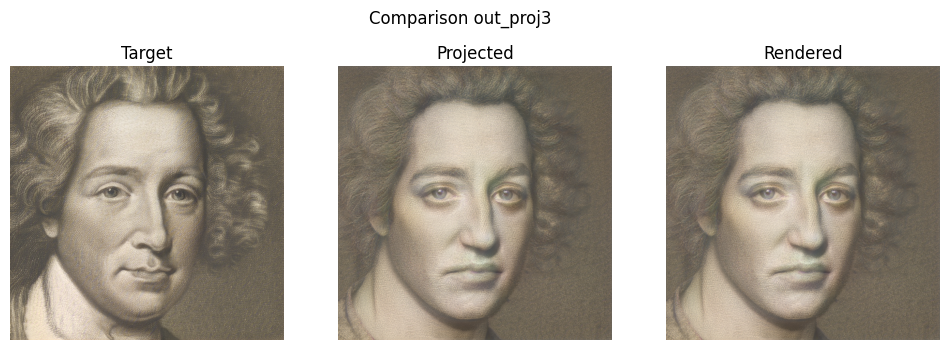

Vector W shape: (1, 18, 512), mean: 0.0966, std: 1.6208


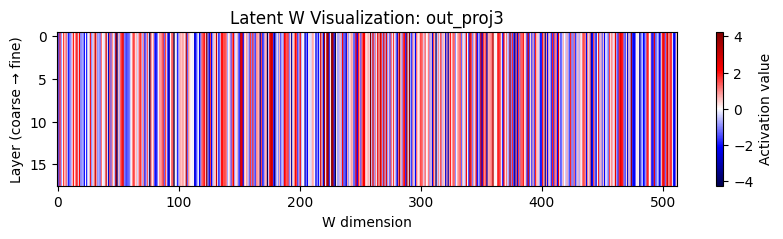

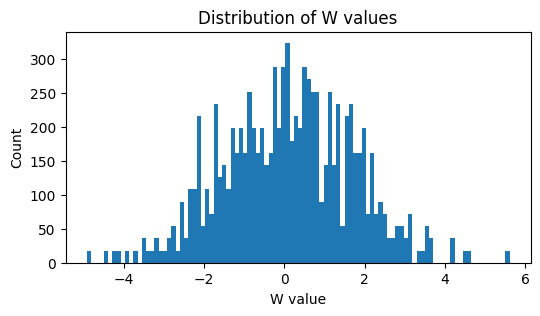

Per-layer mean: [0.097 0.097 0.097 0.097 0.097 0.097 0.097 0.097 0.097 0.097 0.097 0.097
 0.097 0.097 0.097 0.097 0.097 0.097]
Per-layer std : [1.621 1.621 1.621 1.621 1.621 1.621 1.621 1.621 1.621 1.621 1.621 1.621
 1.621 1.621 1.621 1.621 1.621 1.621]
------------------------------ out_proj4 ------------------------------
MSE Target vs Projected: 85.59
MSE Target vs Rendered: 85.40
SSIM Target vs Projected: 0.4792
SSIM Target vs Rendered: 0.4802


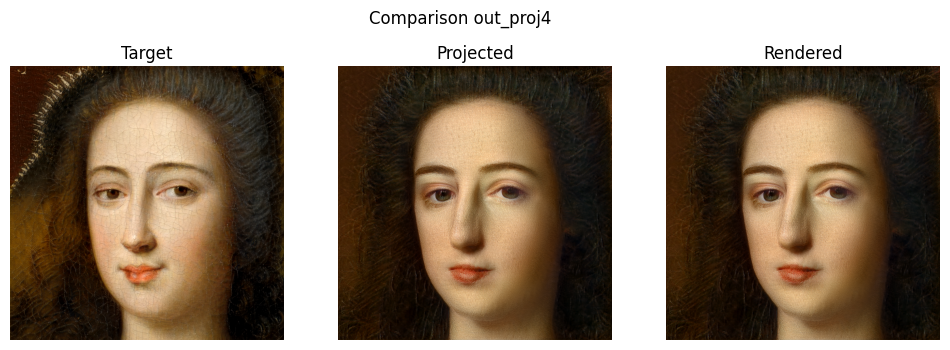

Vector W shape: (1, 18, 512), mean: 0.0931, std: 1.8102


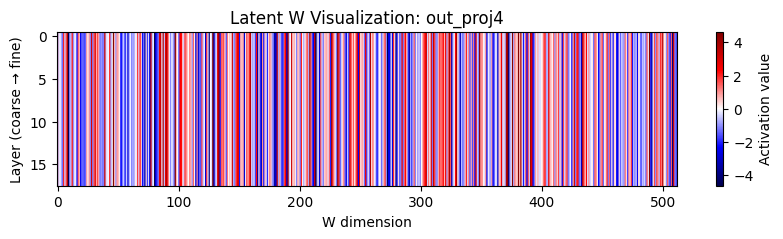

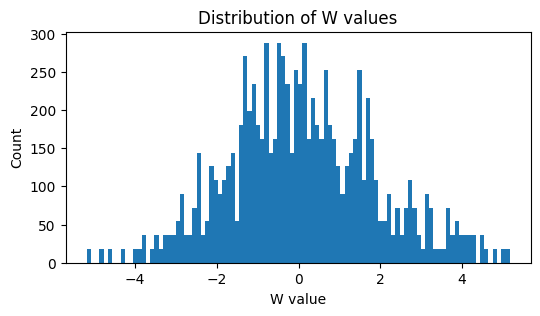

Per-layer mean: [0.093 0.093 0.093 0.093 0.093 0.093 0.093 0.093 0.093 0.093 0.093 0.093
 0.093 0.093 0.093 0.093 0.093 0.093]
Per-layer std : [1.81 1.81 1.81 1.81 1.81 1.81 1.81 1.81 1.81 1.81 1.81 1.81 1.81 1.81
 1.81 1.81 1.81 1.81]


In [4]:
for pfolder, rfolder in zip(proj_folders, render_folders): 
    proj_path = os.path.join(proj_base, pfolder) # path to projection results
    render_path = os.path.join(render_base, rfolder) # path to rendering results

    # load imgs, convert to RGB and arrays
    target_img = np.array(Image.open(os.path.join(proj_path, 'target.png')).convert('RGB'))
    projected_img = np.array(Image.open(os.path.join(proj_path, 'proj.png')).convert('RGB'))
    rendered_img = np.array(Image.open(os.path.join(render_path, 'proj00.png')).convert('RGB'))

    # MSE y SSIM
    # Mean Squared Error, average difference between each pixel of 2 imgs
    # Structural Similarity Index, measure the visual simmilarity between 2 imgs

    mse_proj = np.mean((target_img - projected_img)**2) #between target and projected
    mse_render = np.mean((target_img - rendered_img)**2) #between target and rendered

    ssim_proj = ssim(target_img, projected_img, channel_axis=-1, win_size=3) #between target and projected
    ssim_render = ssim(target_img, rendered_img, channel_axis=-1, win_size=3) #between target and rendered

    print(f"------------------------------ {pfolder} ------------------------------")
    print(f"MSE Target vs Projected: {mse_proj:.2f}")
    print(f"MSE Target vs Rendered: {mse_render:.2f}")
    print(f"SSIM Target vs Projected: {ssim_proj:.4f}")
    print(f"SSIM Target vs Rendered: {ssim_render:.4f}")

    # show imgs target, projected, rendered
    plt.figure(figsize=(12,4))
    plt.subplot(1,3,1)
    plt.imshow(target_img)
    plt.axis('off')
    plt.title('Target')
    plt.subplot(1,3,2)
    plt.imshow(projected_img)
    plt.axis('off')
    plt.title('Projected')
    plt.subplot(1,3,3)
    plt.imshow(rendered_img)
    plt.axis('off')
    plt.title('Rendered')
    plt.suptitle(f'Comparison {pfolder}')
    plt.show()

    # vector W
    w = np.load(os.path.join(proj_path, 'projected_w.npz'))['w']
    # show shape, mean, std
    print(f"Vector W shape: {w.shape}, mean: {w.mean():.4f}, std: {w.std():.4f}")

    # show  w[0] as 2D img with colormap to visualize activations by layer
    vals = w[0]  # shape (n_layers, w_dim)
    vmax = np.percentile(np.abs(vals), 99)
    plt.figure(figsize=(10,2))
    im = plt.imshow(vals, aspect='auto', cmap='seismic', vmin=-vmax, vmax=vmax) #im is the image object
    plt.xlabel('W dimension')
    plt.ylabel('Layer (coarse → fine)')
    plt.title(f'Latent W Visualization: {pfolder}')
    cb = plt.colorbar(im) # plt.colorbar() is used to add a colorbar to the plot
    cb.set_label('Activation value')
    plt.show()

    # histogram + per-layer stats
    plt.figure(figsize=(6,3))
    plt.hist(vals.ravel(), bins=100)
    plt.xlabel('W value')
    plt.ylabel('Count')
    plt.title('Distribution of W values')
    plt.show()

    layer_means = vals.mean(axis=1)
    layer_stds = vals.std(axis=1)
    print('Per-layer mean:', np.round(layer_means,3))
    print('Per-layer std :', np.round(layer_stds,3))

    # store results
    results.append({
        'case': pfolder,
        'MSE_target_projected': mse_proj,
        'MSE_target_rendered': mse_render,
        'SSIM_target_projected': ssim_proj,
        'SSIM_target_rendered': ssim_render,
        'W_shape': w.shape,
        'W_mean': w.mean(),
        'W_std': w.std()
    })

In [5]:
df = pd.DataFrame(results)
print(df)

        case  MSE_target_projected  MSE_target_rendered  \
0  out_proj1             70.550726            70.348854   
1  out_proj2             93.713190            93.720197   
2  out_proj3             87.006374            87.196610   
3  out_proj4             85.591763            85.404647   

   SSIM_target_projected  SSIM_target_rendered       W_shape    W_mean  \
0               0.830068              0.830200  (1, 18, 512)  0.272152   
1               0.693460              0.693629  (1, 18, 512)  0.156022   
2               0.377199              0.377119  (1, 18, 512)  0.096620   
3               0.479241              0.480180  (1, 18, 512)  0.093107   

      W_std  
0  1.712723  
1  2.087658  
2  1.620788  
3  1.810192  
